In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Computational Definition of SDE

Consider first a basic variable $x(t)$ which evoles according to the ODE:

$ \frac{dx}{dt} = f(x,t)$ \
From this we can obtain:\
\
$x(t + dt) = x(t) + f(x(t), t)dt$

Which gives us a simple way to compute the solution to this ODE. This is the forward Euler method.

There is an SDE equivalent of this:

$X(t + \Delta t) = X(t) + f(X(t), t)\Delta t + g(X(t), t) \sqrt{\Delta t} \xi$ 

This is the computational definition of an SDE according to Erban.\
In the above formulation, $f$ corresponds to the drift $\mu$, $g$ to the diffusion $\sigma$

Some examples of plots given by different SDEs

## Euler-Maruyama method for solving an SDE

• Generate a normall dfistributed random number $\xi$\
• Compute $X(t+\Delta t)$ from $X(t)$\
• Repeat\


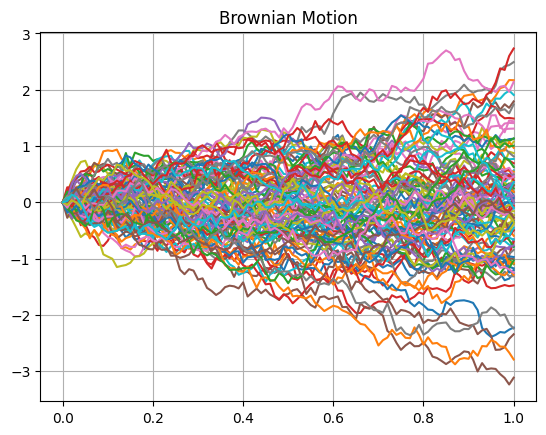

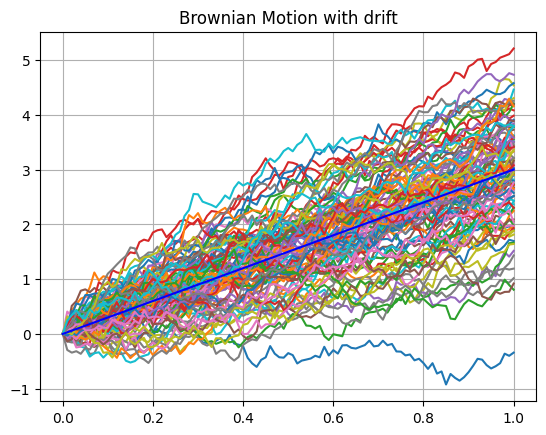

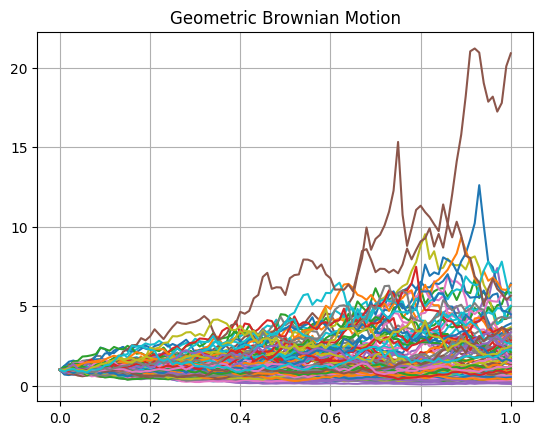

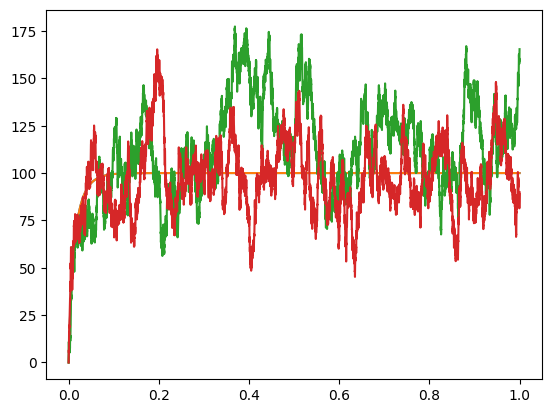

In [2]:
def simulate_sde(drift, diffusion, X0, T=1.0, N=500, M=10):
    """
    Simulates an SDE using the Euler-Maruyama method
    Parameters:
    - drift: function(x,t) -> returns the drift term (μ)
    - diffusion: function(x,t) -> returns the diffusion term (σ)
    - X0: Initial condition (scalar or array)
    - T: Final time
    - N: Number of time steps
    - M: Number of sample paths

    Returns:
    - t: Time grid (1D array)
    - X: Simulated paths M x (N+1) array
    """
    dt = T/N
    t = np.linspace(0, T, N+1)
    dW = np.sqrt(dt) * np.random.randn(M, N)

    # Initialise paths
    X = np.zeros((M, N+1))
    X[:, 0] = X0

    for i in range(N):
        X[:, i+1] = X[:, i] + drift(X[:, i], t[i]) * dt + diffusion(X[:, i], t[i]) * dW[:, i]

    return t, X


# Construct different types of brownian motion now by defining different 
# drift or diffusion terms

#Use following for all constructed paths. 100 timesteps of size 1, 100 sampled paths
N=100
M=100

# Pure brownian motion
bm_drift = lambda x,t: 0
bm_diffusion = lambda x,t: 1

tt, bm_paths = simulate_sde(bm_drift, bm_diffusion, X0=0, N=N, M=M)

plt.plot(tt, bm_paths.T)
plt.title("Brownian Motion")
plt.grid(True)
plt.show()

# Brownian motion with drift
bm_drift = lambda x,t: 3
bm_diffusion = lambda x,t: 1

tt, bm_paths = simulate_sde(bm_drift, bm_diffusion, X0=0, N=N, M=M)

plt.plot(tt, bm_paths.T)
plt.plot(tt, tt*3, 'b-')
plt.title("Brownian Motion with drift")
plt.grid(True)
plt.show()

#Geometric brownian motion:
mu = 1
sigma = 1
X0 = 1.0
gbm_drift = lambda x,t: mu * x
gbm_diffusion = lambda x,t: sigma * x
tt, gbm_paths = simulate_sde(gbm_drift, gbm_diffusion, X0, M=M, N=N)
plt.plot(tt, gbm_paths.T)
plt.title("Geometric Brownian Motion")
plt.grid(True)
plt.show()


#Book example of SDE version of ODE with 2 favourable states
k1 = 10**-3; k2 = 0.75; k3=165; k4=10**4
drift = lambda x,t: -k1*x**3 + k2*x**2 - k3*x + k4
diffusion_det = lambda x,t: 0
diffusion_rand = lambda x,t: 200
tt, det_2_states = simulate_sde(drift, diffusion_det, X0=0, M=2, N=10000)
_, rand_2_states = simulate_sde(drift, diffusion_rand, X0=0, M=2, N=10000)
plt.plot(tt, det_2_states.T)
plt.plot(tt, rand_2_states.T)
plt.show()


Ok we understand Euler-Maruyama.

Now to simulate some 2d random walks

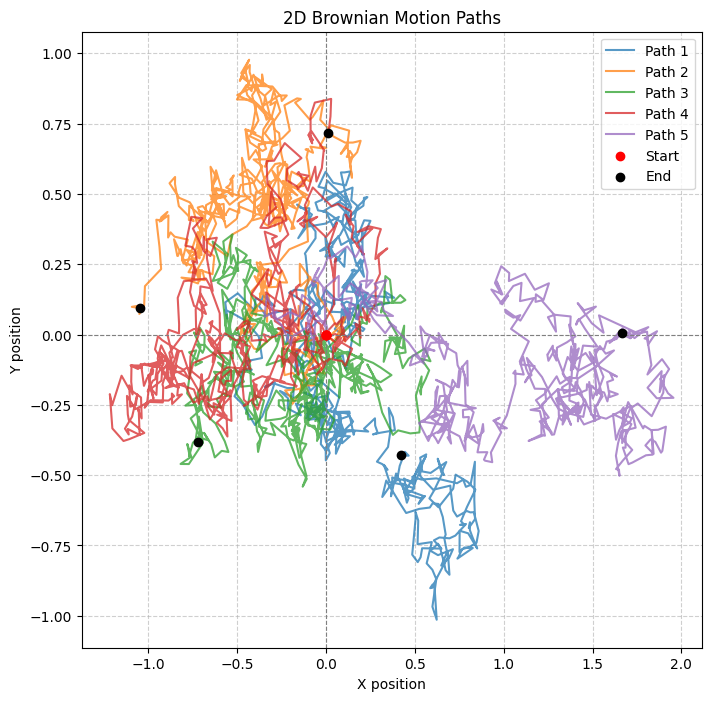

In [4]:
def simulate_2d_brownian_motion(T=1.0, N=500, M=5, sigma=1.0):
    """
    Simulates 2D Brownian motion (random walks in 2D).
    
    Parameters:
    - T: Total simulation time
    - N: Number of time steps
    - M: Number of independent paths
    - sigma: Diffusion coefficient (controls spread)

    Returns:
    - t: Time grid (1D array)
    - X: X-coordinates of paths (M x (N+1) array)
    - Y: Y-coordinates of paths (M x (N+1) array)
    """
    dt = T / N  # Time step size
    t = np.linspace(0, T, N+1)  # Time grid

    # Generate Brownian increments (independent for X and Y)
    dW_x = np.sqrt(dt) * np.random.randn(M, N) * sigma
    dW_y = np.sqrt(dt) * np.random.randn(M, N) * sigma

    # Initialize paths
    X = np.zeros((M, N+1))
    Y = np.zeros((M, N+1))

    # Compute cumulative sum to construct the paths
    X[:, 1:] = np.cumsum(dW_x, axis=1)
    Y[:, 1:] = np.cumsum(dW_y, axis=1)

    return t, X, Y

# Parameters
T = 1.0   # Final time
N = 500   # Time steps
M = 5     # Number of paths
sigma = 1.0  # Diffusivity

# Simulate 2D Brownian motion
tt, X, Y = simulate_2d_brownian_motion(T=T, N=N, M=M, sigma=sigma)

# Plot 2D random walks
plt.figure(figsize=(8, 8))
for i in range(M):
    plt.plot(X[i], Y[i], label=f"Path {i+1}", alpha=0.75)

# Mark starting points
plt.scatter(X[:, 0], Y[:, 0], color="red", label="Start", zorder=3)

# Mark ending points
plt.scatter(X[:, -1], Y[:, -1], color="black", label="End", zorder=3)

# Formatting
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.8)
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("2D Brownian Motion Paths")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Fokker plank equation

pde describing how the pdf of a 1D diffusion process evolves

$ \frac{\partial p}{\partial t} = \frac{\partial^2}{\partial x^2} (\frac{g^2(x,t)}{2}p(x,t)) - \frac{\partial}{\partial x} (f(x,t)p(x,t))$

For the case where there is no drift, i.e. $f(x,t) = 0$ then we obtain 
$p(x,t) = \frac{1}{\sqrt(2\pi t)}\exp(-\frac{x^2}{2t})$

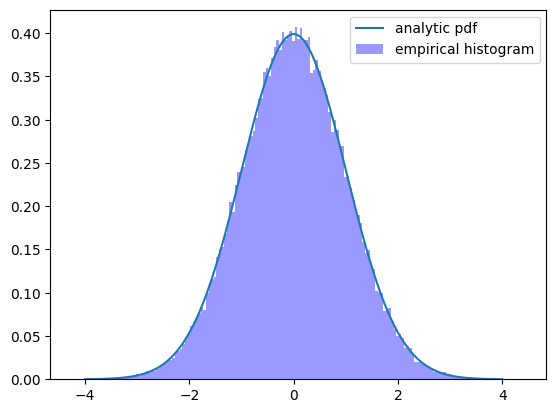

In [5]:
# Empirical PDF calculation
# Pure brownian motion
bm_drift = lambda x,t: 0
bm_diffusion = lambda x,t: 1

tt, bm_paths = simulate_sde(bm_drift, bm_diffusion, X0=0, N=1, M=100000)

final_positions = bm_paths[:, -1]

# Define bin width and calculate histogram
bin_width = 0.05
bins = np.arange(final_positions.min(), final_positions.max() + bin_width, bin_width)

# Compute histogram (normalized to match PDF)
hist_values, bin_edges = np.histogram(final_positions, bins=bins, density=True)

# Compute bin centers for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

#Analytic PDF
pdf = lambda x,t: 1/np.sqrt(2*np.pi*t) * np.exp(-x**2/(2*t))
xx = np.linspace(-4, 4, 10000)
pp = pdf(xx, 1)

#Plot comparison
plt.bar(bin_centers, hist_values, width=bin_width, alpha=0.4, color='blue', label="empirical histogram")
plt.plot(xx, pp, label='analytic pdf')
plt.legend()



## Boundary conditions on Fokker-Planck Equation

Now let's consider a finite boundary. First case is imposing reflective boundary conditions at the edge of the domain. Reflecting at x= 0 and x = 1 for a 1D simulation

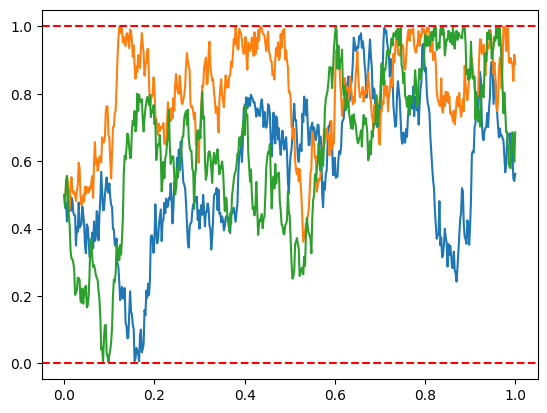

In [6]:
def simulate_sde_reflective(drift, diffusion, X0, T=1.0, N=500, M=10, x_min=0, x_max=1):
    """
    Simulates an SDE with reflective boundaries using Euler-Maruyama.
    """
    
    dt = T/N
    t = np.linspace(0, T, N+1)
    dW = np.sqrt(dt)*np.random.randn(M,N)

    X = np.zeros((M, N+1))
    X[:, 0] = X0
    for i in range(N):
        X_next = X[:, i] + drift(X[:, i], t[i]) * dt + diffusion(X[:, i], t[i]) * dW[:, i]

        # Apply reflective boundary conditions
        X_next = np.where(X_next < x_min, -X_next, X_next)
        X_next = np.where(X_next > x_max, 2*x_max - X_next, X_next)

        X[:, i+1] = X_next
    
    return t, X


# Standard Brownian Motion
drift = lambda x, t: 0 
diffusion = lambda x, t: 1

tt, X_reflective = simulate_sde_reflective(drift, diffusion, X0=0.5, N=500, M=3)
plt.plot(tt, X_reflective.T)
plt.axhline(0, color='red', linestyle='--')
plt.axhline(1, color='red', linestyle='--')

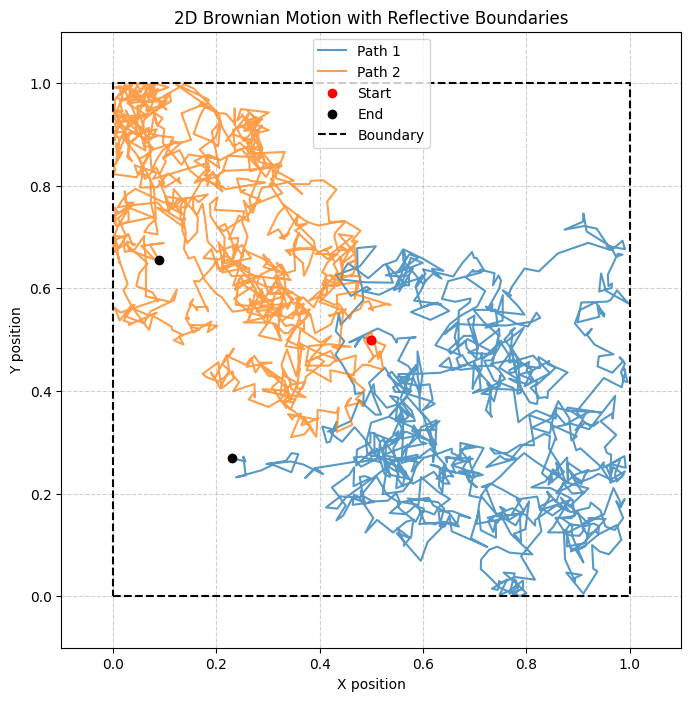

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_2d_sde_reflective(drift_x, diffusion_x, drift_y, diffusion_y,
                               X0, Y0, T=1.0, N=500, M=5, x_min=0, x_max=1, y_min=0, y_max=1):
    """
    Simulates 2D Brownian motion (or other 2D SDE) with reflective boundaries.
    """
    dt = T / N
    t = np.linspace(0, T, N+1)

    # Generate Brownian increments (independent for X and Y)
    dW_x = np.sqrt(dt) * np.random.randn(M, N)
    dW_y = np.sqrt(dt) * np.random.randn(M, N)

    # Initialize paths
    X = np.zeros((M, N+1))
    Y = np.zeros((M, N+1))
    X[:, 0] = X0
    Y[:, 0] = Y0

    # Euler-Maruyama with Reflective Boundaries
    for i in range(N):
        X_next = X[:, i] + drift_x(X[:, i], Y[:, i], t[i]) * dt + diffusion_x(X[:, i], Y[:, i], t[i]) * dW_x[:, i]
        Y_next = Y[:, i] + drift_y(X[:, i], Y[:, i], t[i]) * dt + diffusion_y(X[:, i], Y[:, i], t[i]) * dW_y[:, i]

        # Reflect at x boundaries
        X_next = np.where(X_next < x_min, -X_next, X_next)
        X_next = np.where(X_next > x_max, 2*x_max - X_next, X_next)

        # Reflect at y boundaries
        Y_next = np.where(Y_next < y_min, -Y_next, Y_next)
        Y_next = np.where(Y_next > y_max, 2*y_max - Y_next, Y_next)

        X[:, i+1] = X_next
        Y[:, i+1] = Y_next

    return t, X, Y

#Standard brownian motion in 2d with reflective boundaries

drift_x = lambda x, y, t: 0      
diffusion_x = lambda x, y, t: 0.5

drift_y = lambda x, y, t: 0 
diffusion_y = lambda x, y, t: 0.5

# Parameters
T = 2.0   # Final time
N = 1000  # Time steps
M = 2  # Number of paths
X0 = 0.5  # Initial X position
Y0 = 0.5  # Initial Y position

tt, X_reflect, Y_reflect = simulate_2d_sde_reflective(drift_x, diffusion_x, drift_y, diffusion_y,
                                                      X0, Y0, T=T, N=N, M=M)

# Plot results
plt.figure(figsize=(8, 8))
for i in range(M):
    plt.plot(X_reflect[i], Y_reflect[i], alpha=0.75, label=f"Path {i+1}")

# Mark start points
plt.scatter(X_reflect[:, 0], Y_reflect[:, 0], color="red", label="Start", zorder=3)

# Mark end points
plt.scatter(X_reflect[:, -1], Y_reflect[:, -1], color="black", label="End", zorder=3)

# Draw the box
plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'k--', linewidth=1.5, label="Boundary")

# Formatting
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("2D Brownian Motion with Reflective Boundaries")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Single celled organism with shape now

Now model an object that has an area instead of existing at a single point. Will ue a class based approach to define this, and append methods that simulate and plot it's path.


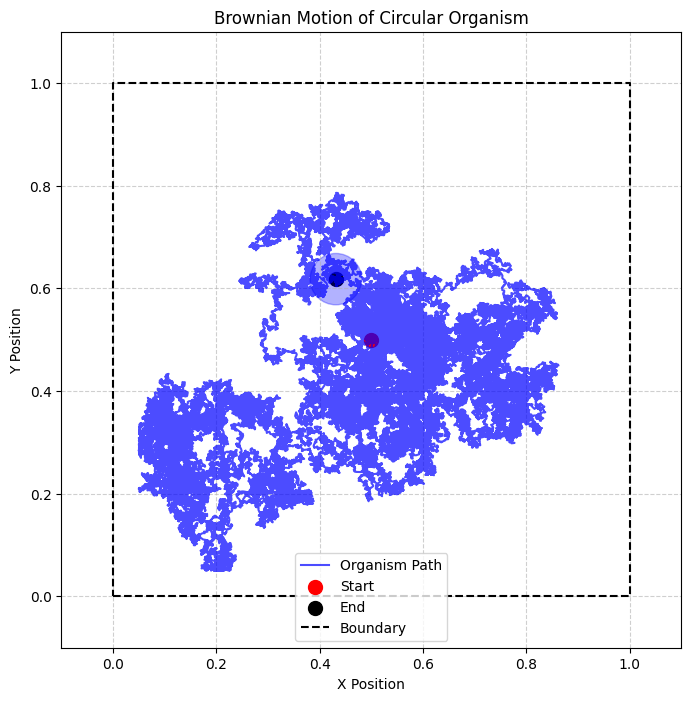

In [4]:
class BrownianOrganism:
    def __init__(self, X0, Y0, R, Lx, Ly, T=1, N=500, sigma=0.5):

        self.T = T
        self.N = N
        self.dt = T/N
        self.Lx = Lx
        self.Ly = Ly
        self.R = R
        self.sigma = sigma

        self.t = np.linspace(0, T, N+1)
        self.X = np.zeros(N+1)
        self.Y = np.zeros(N+1)
        self.X[0] = X0
        self.Y[0] = Y0

    def simulate(self):
        """ Simulate the Brownian motion with reflections for a circular organism """
        dW_x = np.sqrt(self.dt) * np.random.randn(self.N) * self.sigma
        dW_y = np.sqrt(self.dt) * np.random.randn(self.N) * self.sigma

        for i in range(self.N):
            X_next = self.X[i] + dW_x[i]
            Y_next = self.Y[i] + dW_y[i]

            # Reflective conditions for circular object
            if X_next - self.R < 0:
                X_next = 2*self.R - X_next  # Reflect at x=0
            if X_next + self.R > self.Lx:
                X_next = 2*(self.Lx - self.R) - X_next  # Reflect at x=Lx

            if Y_next - self.R < 0:
                Y_next = 2*self.R - Y_next  # Reflect at y=0
            if Y_next + self.R > self.Ly:
                Y_next = 2*(self.Ly - self.R) - Y_next  # Reflect at y=Ly

            self.X[i+1] = X_next
            self.Y[i+1] = Y_next

    def plot(self):
        """ Plot the trajectory of the organism inside the box """
        plt.figure(figsize=(8, 8))
        plt.plot(self.X, self.Y, 'b-', alpha=0.7, label="Organism Path")
        plt.scatter(self.X[0], self.Y[0], color="red", s=100, label="Start")
        plt.scatter(self.X[-1], self.Y[-1], color="black", s=100, label="End")

        # Plot boundaries
        plt.plot([0, self.Lx, self.Lx, 0, 0], [0, 0, self.Ly, self.Ly, 0], 'k--', linewidth=1.5, label="Boundary")

        # Draw organism at final position
        circle = plt.Circle((self.X[-1], self.Y[-1]), self.R, color='blue', alpha=0.3)
        plt.gca().add_patch(circle)

        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.title("Brownian Motion of Circular Organism")
        plt.xlim(-0.1, self.Lx+0.1)
        plt.ylim(-0.1, self.Ly+0.1)
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()

# Parameters
Lx, Ly = 1.0, 1.0  # Box size
R = 0.05  # Organism radius
X0, Y0 = 0.5, 0.5  # Start in the center
T = 2.0  # Final time
N = 100000  # Time steps
sigma = 0.5 # Diffusion coefficient

# Create and simulate organism
organism = BrownianOrganism(X0, Y0, R, Lx, Ly, T, N, sigma)
organism.simulate()
organism.plot()


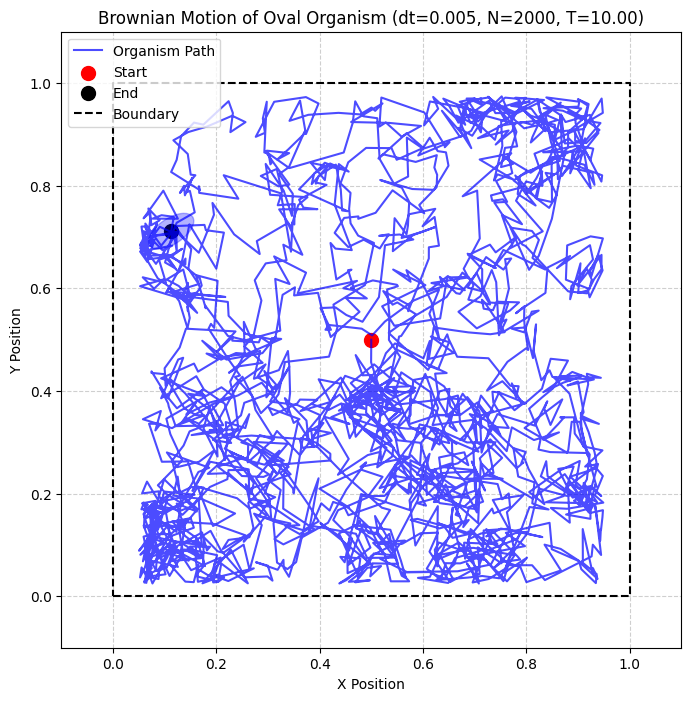

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

class BrownianOval:
    def __init__(self, X0, Y0, a, b, Lx, Ly, dt=0.01, N=500, sigma=0.02):
        """
        Simulates a 2D oval (ellipse) organism moving under Brownian motion.

        Parameters:
        - X0, Y0: Initial center position
        - a, b: Major and minor axis lengths of the oval
        - Lx, Ly: Box dimensions
        - dt: Timestep size (fixed)
        - N: Number of timesteps (now independent of dt)
        - sigma: Diffusion coefficient (step size of Brownian motion)
        """
        self.dt = dt
        self.N = N  # Now, N controls how long the simulation runs
        self.T = N * dt  # Compute total simulation time
        self.Lx = Lx
        self.Ly = Ly
        self.a = a  # Major axis length
        self.b = b  # Minor axis length
        self.sigma = sigma

        # Initialize positions and angles
        self.t = np.linspace(0, self.T, self.N+1)
        self.X = np.zeros(self.N+1)
        self.Y = np.zeros(self.N+1)
        self.theta = np.zeros(self.N+1)  # Orientation angle of the oval

        self.X[0] = X0
        self.Y[0] = Y0
        self.theta[0] = np.random.uniform(0, 2*np.pi)  # Random initial orientation

    def simulate(self):
        """ Simulate the Brownian motion with reflective boundaries for an oval-shaped organism """
        dW_x = np.sqrt(self.dt) * np.random.randn(self.N) * self.sigma
        dW_y = np.sqrt(self.dt) * np.random.randn(self.N) * self.sigma
        dTheta = np.sqrt(self.dt) * np.random.randn(self.N) * 0.1  # Small random rotation

        for i in range(self.N):
            X_next = self.X[i] + dW_x[i]
            Y_next = self.Y[i] + dW_y[i]
            Theta_next = self.theta[i] + dTheta[i]  # Randomly change orientation

            # Reflective conditions for the oval (considering half-axes a/2 and b/2)
            if X_next - self.a/2 < 0:
                X_next = 2*(self.a/2) - X_next  # Reflect at x=0
            if X_next + self.a/2 > self.Lx:
                X_next = 2*(self.Lx - self.a/2) - X_next  # Reflect at x=Lx

            if Y_next - self.b/2 < 0:
                Y_next = 2*(self.b/2) - Y_next  # Reflect at y=0
            if Y_next + self.b/2 > self.Ly:
                Y_next = 2*(self.Ly - self.b/2) - Y_next  # Reflect at y=Ly

            self.X[i+1] = X_next
            self.Y[i+1] = Y_next
            self.theta[i+1] = Theta_next  # Update angle

    def plot(self):
        """ Plot the trajectory of the oval organism inside the box """
        plt.figure(figsize=(8, 8))
        plt.plot(self.X, self.Y, 'b-', alpha=0.7, label="Organism Path")
        plt.scatter(self.X[0], self.Y[0], color="red", s=100, label="Start")
        plt.scatter(self.X[-1], self.Y[-1], color="black", s=100, label="End")

        # Plot boundaries
        plt.plot([0, self.Lx, self.Lx, 0, 0], [0, 0, self.Ly, self.Ly, 0], 'k--', linewidth=1.5, label="Boundary")

        # Draw oval at final position with correct orientation
        ellipse = Ellipse((self.X[-1], self.Y[-1]), width=self.a, height=self.b,
                          angle=np.degrees(self.theta[-1]), color='blue', alpha=0.3)
        plt.gca().add_patch(ellipse)

        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.title(f"Brownian Motion of Oval Organism (dt={self.dt}, N={self.N}, T={self.T:.2f})")
        plt.xlim(-0.1, self.Lx+0.1)
        plt.ylim(-0.1, self.Ly+0.1)
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()

# Parameters
Lx, Ly = 1.0, 1.0  # Box size
a, b = 0.1, 0.05  # Major and minor axes of the oval
X0, Y0 = 0.5, 0.5  # Start in the center
dt = 0.005  # Fixed timestep size
N = 2000  # Now, N controls how long the simulation runs
sigma = 0.5  # Diffusion coefficient

# Create and simulate oval organism
oval_organism = BrownianOval(X0, Y0, a, b, Lx, Ly, dt, N, sigma)
oval_organism.simulate()
oval_organism.plot()


### Brownian Microswimmer

Now to simulate how the following microswimmer will behave. It has the following dynamics:

$X(t+\Delta t) = X(t) + U\cos\theta(t)\Delta t + \sqrt{2D\Delta t}\xi_1$\
$Y(t+\Delta t) = Y(t) + U\sin\theta(t)\Delta t + \sqrt{2D\Delta t}\xi_2$\
$\theta(t + \Delta t) = \theta(t) + \sqrt{2D\Delta t}\xi_3$ 

Let's simulate this with the Von Neumann Boundary conditions (i.e. reflects back)

Value of $D$ used in the textbook: $D = 10^{-4}\text{mm}^2\text{sec}^{-1}$

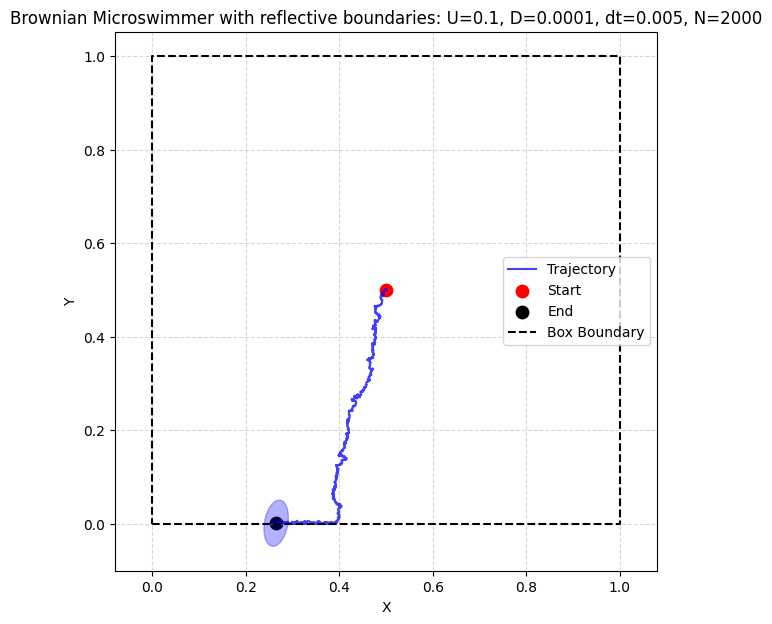

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

class BrownianSwimmer:
    def __init__(self, U=0.1, D=10**(-4), dt=0.01, N=2000, X0=0.5, Y0=0.5,
                 a=0.1, b=0.05, x_min=0, x_max=1, y_min=0, y_max=1):
        """
        Simulates a 2D little microorganism swimming around a box.

        Parameters:
        - U: Self-propulsion speed
        - D: Diffusion coefficient (how fast the little guy moves through water)
        - dt: Timestep size (fixed)
        - N: Number of timesteps (now independent of dt)
        - X0, Y0: Initial position, initial orientation is random
        - a, b: Major and minor axis lengths of our ovular brownian swimmer
        - Lx, Ly: width and height of box from (0,0)
        """
        self.U = U
        self.D = D
        self.dt = dt
        self.N = N
        self.X0 = X0
        self.Y0 = Y0
        self.a = a
        self.b = b
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        
        #Compute total time
        self.T = N * dt


        # Initialize positions and angles
        self.t = np.linspace(0, self.T, self.N+1)
        self.X = np.zeros(self.N+1)
        self.Y = np.zeros(self.N+1)
        self.theta = np.zeros(self.N+1)  # Orientation angle of the oval

        self.X[0] = X0
        self.Y[0] = Y0
        self.theta[0] = np.random.uniform(0, 2*np.pi)  # Random initial orientation

    def simulate(self):
        """ Simulate the Brownian motion with reflective boundaries for an oval-shaped organism """

        for i in range(self.N):

            xi1, xi2, xi3 = np.random.randn(3)

            X_next = ( self.X[i] 
                      + self.U*np.cos(self.theta[i]) * self.dt 
                      + np.sqrt(2*self.D*self.dt)*xi1 )
            
            Y_next = (self.Y[i] 
                      + self.U*np.sin(self.theta[i]) * self.dt
                      + np.sqrt(2*self.D*self.dt)*xi2 )
            
            theta_next = self.theta[i] + np.sqrt(2*self.D*self.dt) *xi3

            # Reflective Von Neuman boundaries
            if X_next < self.x_min:
                X_next = 2*self.x_min - X_next
            elif X_next > self.x_max:
                X_next = 2*self.x_max - X_next

            if Y_next < self.y_min:
                Y_next = 2*self.y_min - Y_next
            elif Y_next > self.y_max:
                Y_next = 2*self.y_max - Y_next

            #Store
            self.X[i+1] = X_next
            self.Y[i+1] = Y_next
            self.theta[i+1] = theta_next

    def plot(self):
        """
        Plot the trajectory and draw an ellipse at the final position/orientation.
        """
        plt.figure(figsize=(7,7))
        
        # Plot path
        plt.plot(self.X, self.Y, 'b-', label="Trajectory", alpha=0.75)
        
        # Mark start & end
        plt.scatter(self.X[0], self.Y[0], color='red', s=80, label="Start")
        plt.scatter(self.X[-1], self.Y[-1], color='black', s=80, label="End")
        
        # Draw final oval
        ellipse = Ellipse(
            (self.X[-1], self.Y[-1]),
            width=self.a, height=self.b,
            angle=np.degrees(self.theta[-1]),
            color='blue', alpha=0.3
        )
        plt.gca().add_patch(ellipse)
        
        # Draw box boundaries
        xs = [self.x_min, self.x_max, self.x_max, self.x_min, self.x_min]
        ys = [self.y_min, self.y_min, self.y_max, self.y_max, self.y_min]
        plt.plot(xs, ys, 'k--', label="Box Boundary")
        
        # Final formatting
        plt.axis('equal')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title(f"Brownian Microswimmer with reflective boundaries: U={self.U}, D={self.D}, dt={self.dt}, N={self.N}")
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.legend()
        plt.show()

# Parameters
x_min, x_max = 0, 1  # Box size
y_min, y_max = 0, 1
a, b = 0.1, 0.05  # Major and minor axes of the oval
X0, Y0 = 0.5, 0.5  # Start in the center
dt = 0.005  # Fixed timestep size
N = 2000  # Now, N controls how long the simulation runs
D = 10**(-4)  # Diffusion coefficient
U = 0.1

# Create and simulate oval organism
oval_organism = BrownianSwimmer(U, D, dt, N, X0, Y0, a, b, x_min, x_max, y_min, y_max)
oval_organism.simulate()
oval_organism.plot()
